# Plotting histograms w/ `Matplotlib`.
This is an exercise following official page of [Matplotlib_Statistics_Histograms](https://matplotlib.org/stable/gallery/statistics/hist.html#plot-a-2d-histogram) to get used to it.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# crete a random number generator
rng = np.random.default_rng(19680801)

### Plot 1D histogram from a randomly generated data

(array([2.0000e+00, 7.0000e+00, 3.5000e+01, 1.6700e+02, 5.8300e+02,
        1.6940e+03, 4.0790e+03, 7.7440e+03, 1.2722e+04, 1.6451e+04,
        1.7521e+04, 1.5792e+04, 1.1348e+04, 6.6990e+03, 3.2310e+03,
        1.3030e+03, 4.4600e+02, 1.3800e+02, 3.5000e+01, 3.0000e+00]),
 array([3.14107895, 3.32041261, 3.49974627, 3.67907994, 3.8584136 ,
        4.03774726, 4.21708093, 4.39641459, 4.57574825, 4.75508192,
        4.93441558, 5.11374924, 5.29308291, 5.47241657, 5.65175023,
        5.8310839 , 6.01041756, 6.18975122, 6.36908488, 6.54841855,
        6.72775221]),
 <BarContainer object of 20 artists>)

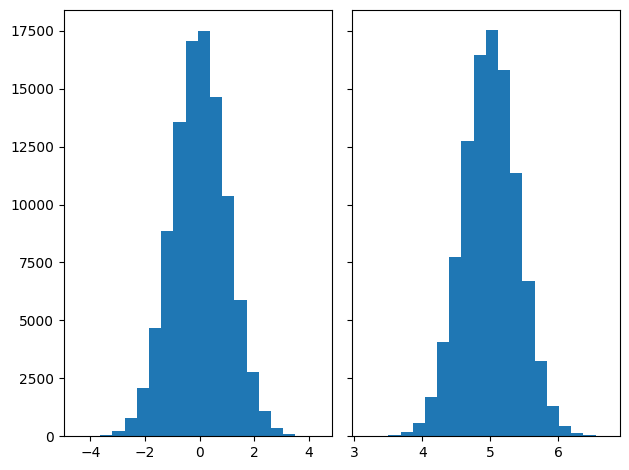

In [8]:
N_points = 100000  # number of points
n_bins = 20  # number of bins

# generate two normal distributions
dist1 = rng.standard_normal(N_points)
dist2 = 0.4 * rng.standard_normal(N_points) + 5

# plot 1D histograms(1D requires only a single vector, while 2D histogram need two vectors as decribed below)
fix, axs= plt.subplots(1, 2, sharey=True, tight_layout=False)

axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist2, bins=n_bins)

# color the histogram for visualization(via normaliztion)

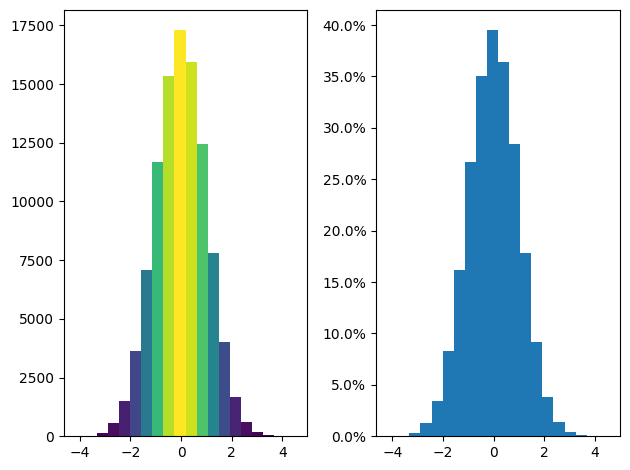

In [17]:
fix, axs = plt.subplots(1, 2, tight_layout=True)

# N is the count(frequency) in each bin, bins is the lower-limit of the bin by splitting dist1-histogram into n intervals
N, bins, patches = axs[0].hist(dist1, bins=n)  # patches consists of each bar objects

# By normalize frequency(height), color code by height
fracs = N / N.max()

# need to normalize the data for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())  # normalize our data via colors.Normalize

# loop through objects and set the color of each accordingly
for frac, patch in zip(fracs, patches):
    color = plt.cm.viridis(norm(frac))  # virdis color map
    patch.set_facecolor(color)

# normalize(by settin density=True) our inputs by the total number of counts
axs[1].hist(dist1, bins=n, density=True)

# format the y-axis to display percentage, xmax=1 sets the max val. of y-axis to be 1
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

### Plot a 2D histogram
We only need two vectors of the same length, corresponding to each axis of the histogram.

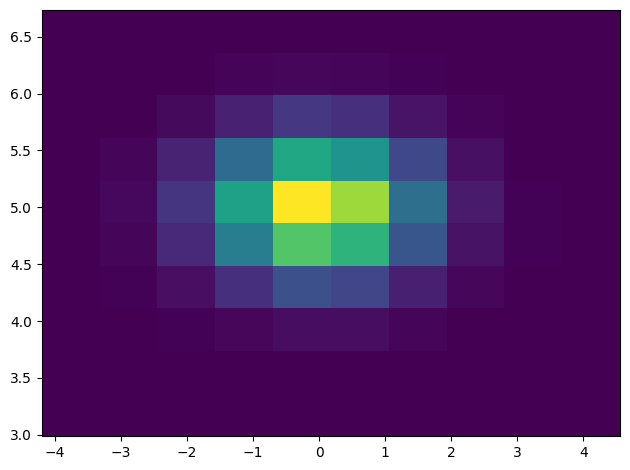

In [12]:
fix, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(dist1, dist2)  # dist1 lies on the x-axis

My question #1) But what does this 2D histogram represents?<br>
-> This plot represents `dist1` in the x-axis while `dist2` in the y=axis.<br>
One is able to see: for exmaple, yellow area represents the density there are higher than the remaining ones. While blue ones are scarcer.
This (roughly) summarizes the correlation between two distributions through colors(colormap). e.g. if they were correlated somehow, its diagonal is conentrated. When two distributions are independet to each other, color would be uniformly distributed.<br>

Question #2) Are there any explicit (mathematical description/formula) for this correlation?, I mean in terms of the color density.

### Customizing (the visual components of) 2D histogram such as the bin size and color normalization


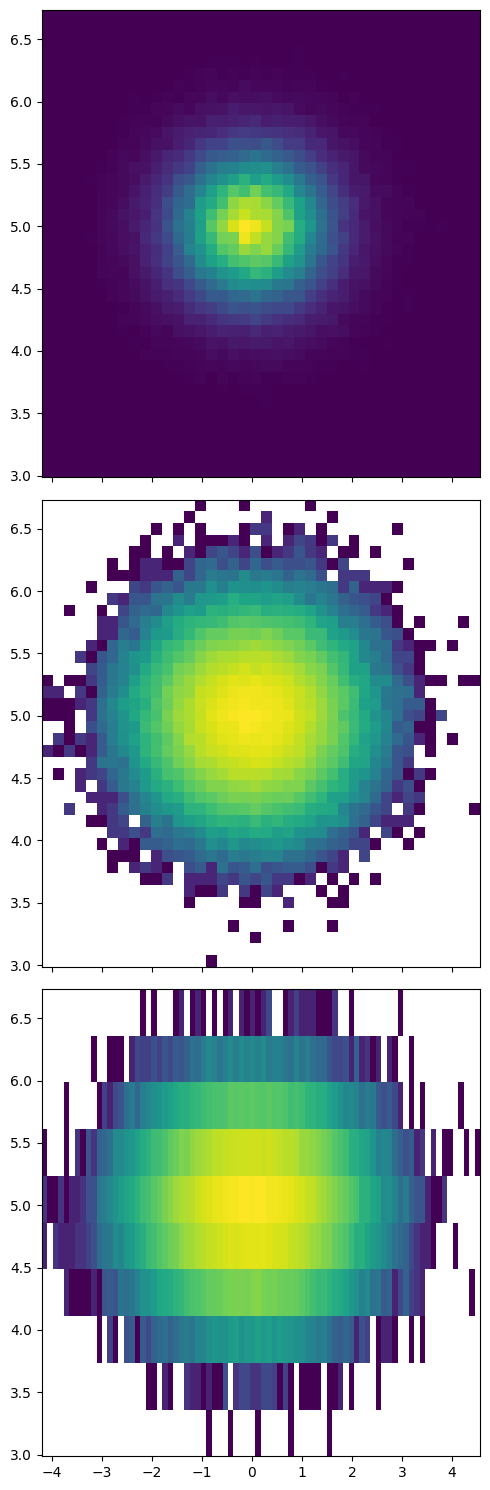

In [21]:
fig, axs = plt.subplots(3, 1, figsize=(5, 15), sharex=True, sharey=True, 
                        tight_layout=True)

# increase the number of bins on each axis
axs[0].hist2d(dist1, dist2, bins=40)

# defining normalization of the colors
axs[1].hist2d(dist1, dist2, bins=40, norm=colors.LogNorm())

axs[2].hist2d(dist1, dist2, bins=(80, 10), norm=colors.LogNorm())

plt.show()

### Using a histogram to plot a cumulative distribution


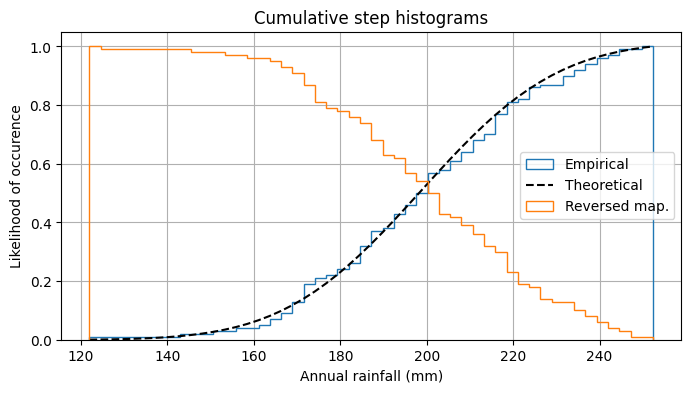

In [30]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

mu = 200
sigma = 25
n_bins = 50
x = np.random.normal(mu, sigma, size=100)

fix, ax = plt.subplots(figsize=(8, 4))

# plot the culmulative histogram
n, bins, patches = ax.hist(x, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')

# add a line showing the expected distribution
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu)) ** 2))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# overlay a reversed(via cumulative=-1) cumulative histogram
ax.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,
        label='Reversed map.')


# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Annual rainfall (mm)')
ax.set_ylabel('Likelihood of occurence')

plt.show()

# probability distributions

Histrograms

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# setup for (randomly given) sample distribution

np.random.seed(10680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation
x = mu + sigma * np.random.random(437)

num_bins = 50

AttributeError: 'Axes' object has no attribute 'plots'

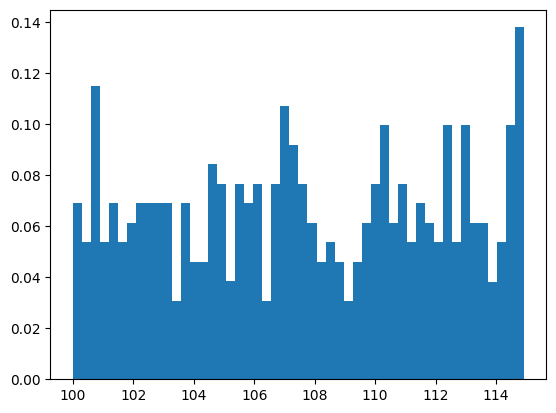

In [9]:
fix, ax = plt.subplots()

n, bins, patches = ax.hist(x, num_bins, density=True)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plots(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

fig.tight_layout()
plt.show()

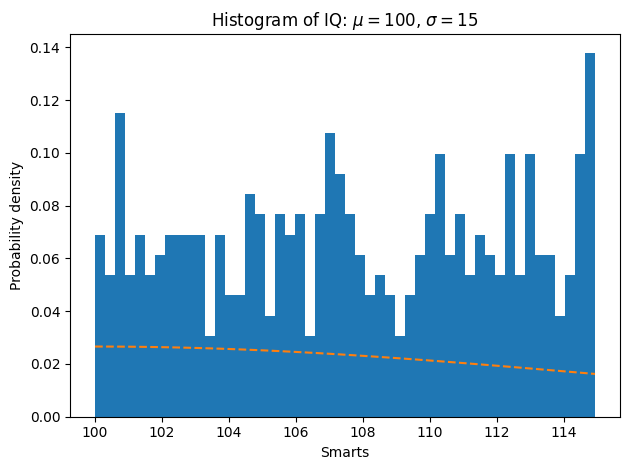

In [10]:
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

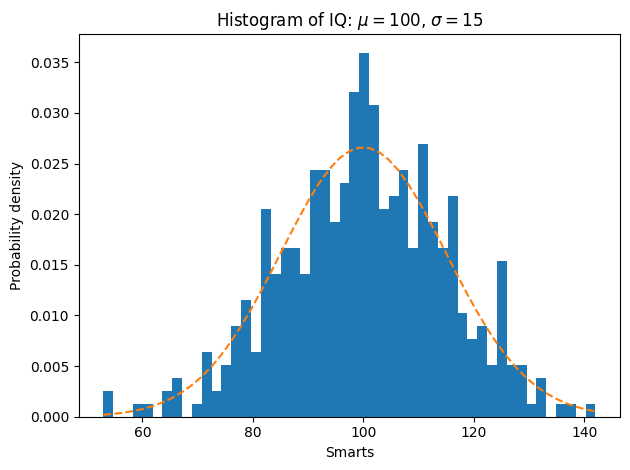

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()